### HomeWork 2- 
<h1 align="center"> 17350796</h1>

In [1]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats




# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 



from sklearn.ensemble import RandomForestRegressor



import seaborn as sns



import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm



In [2]:
# df = pd.read_csv('final-file-additonal-features-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

df = pd.read_csv('final-file-additonal-features-17350796.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)



In [3]:
df.head()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
0,2016-06-05 00:00:00,"21 curzon st, portobello, d8",d8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2016.0,0.032830,Summer,Leinster,298.73,35037.0,d8
1,2014-12-22 00:00:00,"44 rothe abbey, kilmainham, d8",d8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2014.0,0.032830,Winter,Leinster,258.63,31897.0,d8
2,2020-05-22 00:00:00,"17 merrion park, blackrock, dublin",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2020.0,0.032830,Spring,Leinster,425.89,Unkown,NaN
3,2014-11-27 00:00:00,"knockroe, rathmoyle, co.kilkenny",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2014.0,0.806452,Autumn,Leinster,258.63,31897.0,NaN
4,2018-11-22 00:00:00,"15 shannon park, lifford rd, ennis",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2018.0,0.432900,Autumn,Munster,384.85,Unkown,NaN


In [4]:
df.tail()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
9542,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2012.0,0.032830,Winter,Leinster,225.51,17769.0,NaN
9543,2016-12-14 00:00:00,"the log cabin, forge cottage, cullenstown",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.286533,Winter,Leinster,298.73,35037.0,NaN
9544,2017-06-19 00:00:00,"carrig rd, parkmore, roscrea",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2017.0,0.371747,Summer,Munster,334.6,Unkown,NaN
9545,2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,Winter,NaN,NaN,NaN,NaN
9546,2022-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.000000,Winter,NaN,NaN,NaN,NaN


In [5]:
# df = df[df.Address != 0]
df = df[df.Address.notnull()]

df.tail()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,percent,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
9540,2016-12-22 00:00:00,"8 oakpark, newcastle west, limerick",NaN,Limerick,118000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.294118,Winter,Munster,298.73,35037.0,NaN
9541,2017-12-15 00:00:00,"knockasartnett, killarney, kerry",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2017.0,0.370370,Winter,Munster,334.6,Unkown,NaN
9542,2012-12-18 00:00:00,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2012.0,0.032830,Winter,Leinster,225.51,17769.0,NaN
9543,2016-12-14 00:00:00,"the log cabin, forge cottage, cullenstown",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2016.0,0.286533,Winter,Leinster,298.73,35037.0,NaN
9544,2017-06-19 00:00:00,"carrig rd, parkmore, roscrea",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2017.0,0.371747,Summer,Munster,334.6,Unkown,NaN


In [6]:
# Converting NaN values to None

df = df.fillna('none')


#### Deleting redundant column:

In [7]:

# deleting percent column
del df["percent"]

#### Checking for NaN values

In [104]:

((df['Price (€)'] == 'None')).any()


False

In [105]:
df.isnull().values.any()


False

#### Removing extreme Prices:

In [9]:

numeric_columns = df.select_dtypes(['float64','int']).columns

df[numeric_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
Price (€),9545.0,259411.117276,284346.547436,5500.0,123000.0,206090.0,314977.97,7600000.0
Month,9545.0,6.869565,3.480466,1.0,4.0,7.0,10.00,12.0
Year,9545.0,2016.524358,3.101567,2010.0,2014.0,2017.0,2019.00,2022.0


In [10]:
q = df["Price (€)"].quantile(0.99)
df[df["Price (€)"] < q]
q_low = df["Price (€)"].quantile(0.01)
q_hi  = df["Price (€)"].quantile(0.99)

df = df[(df["Price (€)"] < q_hi) & (df["Price (€)"] > q_low)]

df[numeric_columns].describe().T


,count,mean,std,min,25%,50%,75%,max
Price (€),9353.0,242615.317045,172325.996980,22000.0,125000.0,206090.0,310000.0,1255000.0
Month,9353.0,6.866353,3.478471,1.0,4.0,7.0,10.0,12.0
Year,9353.0,2016.519833,3.102721,2010.0,2014.0,2017.0,2019.0,2022.0


In [11]:
df.head()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
0,2016-06-05 00:00:00,"21 curzon st, portobello, d8",d8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2016.0,Summer,Leinster,298.73,35037.0,d8
1,2014-12-22 00:00:00,"44 rothe abbey, kilmainham, d8",d8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2014.0,Winter,Leinster,258.63,31897.0,d8
2,2020-05-22 00:00:00,"17 merrion park, blackrock, dublin",none,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2020.0,Spring,Leinster,425.89,Unkown,none
3,2014-11-27 00:00:00,"knockroe, rathmoyle, co.kilkenny",none,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2014.0,Autumn,Leinster,258.63,31897.0,none
4,2018-11-22 00:00:00,"15 shannon park, lifford rd, ennis",none,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2018.0,Autumn,Munster,384.85,Unkown,none


In [12]:
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')

df['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(df['Date of Sale (yyyy/mm/dd)'])

df['Month'] = df['Month'].astype('category')

df['Year'] = df['Year'].astype('category')


df['Province'] = df['Province'].astype('category')

df['GDP (USD-Billion)'] = df['GDP (USD-Billion)'].astype('category')



df['Total Number of Loans Approved'] = df['Total Number of Loans Approved'].astype('category')

df['Season'] = df['Season'].astype('category')

df['Added Post Codes'] = df['Added Post Codes'].astype('category')

















df.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [13]:
df.isnull().values.any()


False

## (1) Data understanding and perparation

#####  Exploring relationships between feature pairs and selecting/transforming promising features based on a given training set.

#### (1.1) Randomly shuffle the rows of your dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [97]:

# X, y = df.data, df.target


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


train, test = train_test_split(df, test_size=0.3, random_state=1)


In [98]:
train.shape

(6547, 16)

In [16]:
train

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
551,2021-04-01,"lisieux house, turbotstown, coole",none,Westmeath,260000.00,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2021.0,Spring,Leinster,440.0,Unkown,none
4758,2015-05-22,"25 woodview court, glenalbyn rd, stillorgan",none,Dublin,285000.00,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2015.0,Spring,Leinster,291.46,32236.0,none
4358,2016-02-24,"10 lar easa court, strandhill, sligo",none,Sligo,101000.00,No,No,Second-Hand Dwelling house /Apartment,None,2.0,2016.0,Winter,Connaught,298.73,35037.0,none
1643,2019-06-18,"47 sandyhill gardens, ballymun, d11",d11,Dublin,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,6.0,2019.0,Summer,Leinster,399.12,Unkown,d11
3511,2013-11-25,"19 ard na mul lis na dara, carrick road, dundalk",none,Louth,167000.00,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2013.0,Autumn,Leinster,238.21,19258.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2972,2017-07-19,"apt 42 new bancroft centre, main street, tallaght",d24,Dublin,183593.98,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7.0,2017.0,Summer,Leinster,334.6,Unkown,d24
7975,2019-07-10,"27 ilex house, mespil house flats estate, suss...",d4,Dublin,350000.00,No,No,Second-Hand Dwelling house /Apartment,None,7.0,2019.0,Summer,Leinster,399.12,Unkown,d4
925,2013-04-01,"63 mount eagle view, leopardstown heights",d18,Dublin,408350.00,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2013.0,Spring,Leinster,238.21,19258.0,d18
5312,2020-10-29,"4 willow park, westminster park, foxrock d18",d18,Dublin,520000.00,No,No,Second-Hand Dwelling house /Apartment,None,10.0,2020.0,Autumn,Leinster,425.89,Unkown,d18


- The only continuous data type in my data set is the price data. Therefore, I will only be plotting pairwise interactions between the target feature of price and my categorical features

In [17]:
train['County'] = train['County'].astype('category')

# There are a set number of unique descriptions

train['Description of Property'] = train['Description of Property'].astype('category')

train['Address'] = train['Address'].astype('category')


# Postal code has a set number of unique categories
train['Postal Code'] = train['Postal Code'].astype('category')

# There are a set number of property size descriptions
train['Property Size Description'] = train['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
train['VAT Exclusive'] = train['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
train['Not Full Market Price'] = train['Not Full Market Price'].astype('category')

train['Date of Sale (yyyy/mm/dd)'] = pd.to_datetime(train['Date of Sale (yyyy/mm/dd)'])

train['Month'] = train['Month'].astype('category')

train['Year'] = train['Year'].astype('category')


train['Province'] = train['Province'].astype('category')

train['GDP (USD-Billion)'] = train['GDP (USD-Billion)'].astype('category')



train['Total Number of Loans Approved'] = train['Total Number of Loans Approved'].astype('category')

train['Season'] = train['Season'].astype('category')

train['Added Post Codes'] = train['Added Post Codes'].astype('category')









train.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [18]:
train.head(3)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
551,2021-04-01,"lisieux house, turbotstown, coole",none,Westmeath,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2021.0,Spring,Leinster,440.0,Unkown,none
4758,2015-05-22,"25 woodview court, glenalbyn rd, stillorgan",none,Dublin,285000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2015.0,Spring,Leinster,291.46,32236.0,none
4358,2016-02-24,"10 lar easa court, strandhill, sligo",none,Sligo,101000.0,No,No,Second-Hand Dwelling house /Apartment,None,2.0,2016.0,Winter,Connaught,298.73,35037.0,none


In [19]:
category_columns = train.select_dtypes(['category']).columns
target_feature = train.select_dtypes(['float64']).columns



In [20]:
train.tail(1)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year,Season,Province,GDP (USD-Billion),Total Number of Loans Approved,Added Post Codes
237,2019-05-31,"85 gleann alainn, tullyallen, drogheda",none,Louth,323000.0,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2019.0,Spring,Leinster,399.12,Unkown,none


### (1.2) On the training set:
####    - Plot the correlations between all the continuous features (if any). Discuss what you observe in these plots.
####    - For each categorical feature, plot its pairwise interaction with the target feature. Discuss what knowledge you gain from these plots, e.g., which categorical features seem to be better at predicting the target feature? Choose a subset of categorical features you find promising (if any). Justify your choices

### County

<AxesSubplot:xlabel='County', ylabel='Price (€)'>

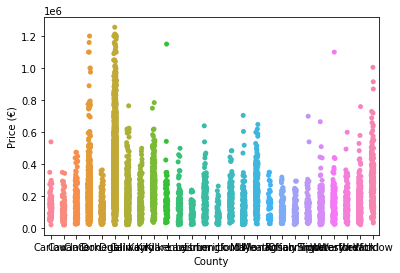

In [21]:
sns.stripplot(x="County", y="Price (€)", data=train) 


<AxesSubplot:xlabel='County', ylabel='Price (€)'>

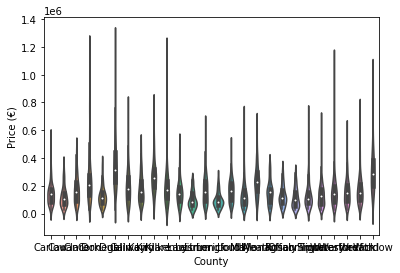

In [22]:
sns.violinplot(x="County", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

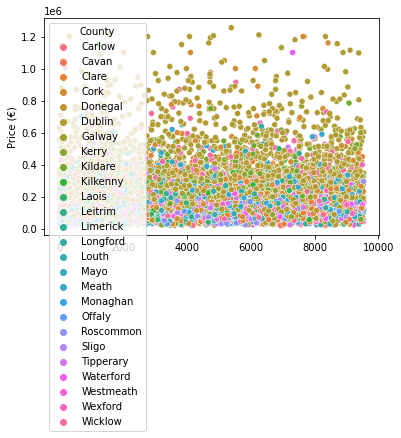

In [23]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='County')


### Description of Property 

<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

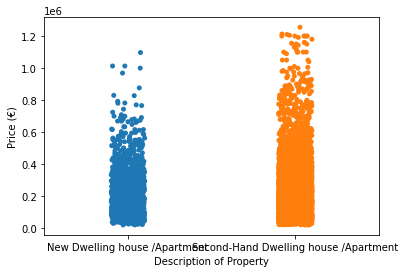

In [24]:
sns.stripplot(x="Description of Property", y="Price (€)", data=train) 


<AxesSubplot:xlabel='Description of Property', ylabel='Price (€)'>

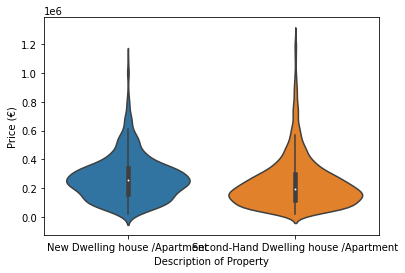

In [25]:
sns.violinplot(x="Description of Property", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

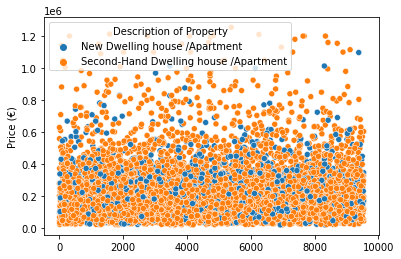

In [26]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Description of Property')


### Property Size Description

<AxesSubplot:xlabel='Property Size Description', ylabel='Price (€)'>

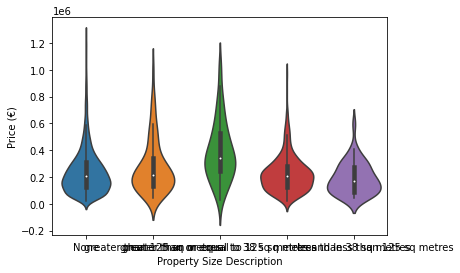

In [27]:
sns.violinplot(x="Property Size Description", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

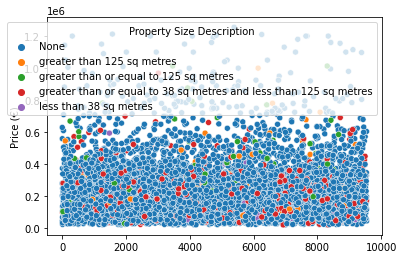

In [28]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Property Size Description')


### Month

<AxesSubplot:xlabel='Month', ylabel='Price (€)'>

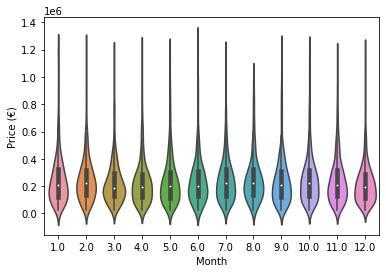

In [29]:
sns.violinplot(x="Month", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

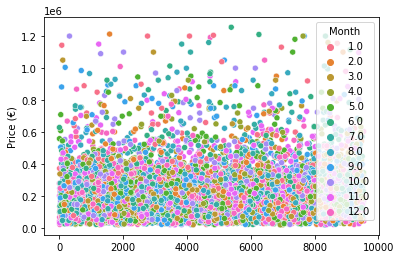

In [30]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Month')


### Year

<AxesSubplot:xlabel='Year', ylabel='Price (€)'>

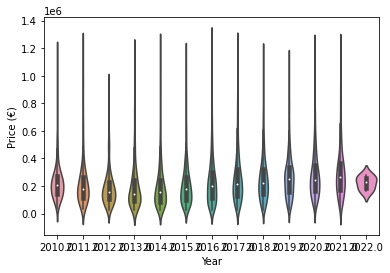

In [31]:
sns.violinplot(x="Year", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

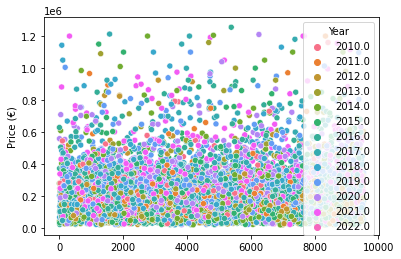

In [32]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Province

<AxesSubplot:xlabel='Province', ylabel='Price (€)'>

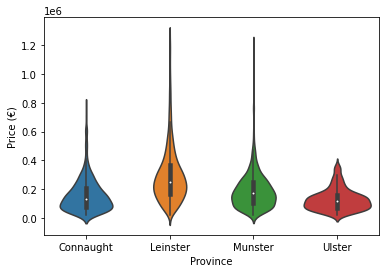

In [33]:
sns.violinplot(x="Province", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

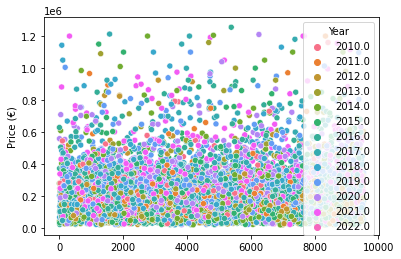

In [34]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Year')


### Season

<AxesSubplot:xlabel='Season', ylabel='Price (€)'>

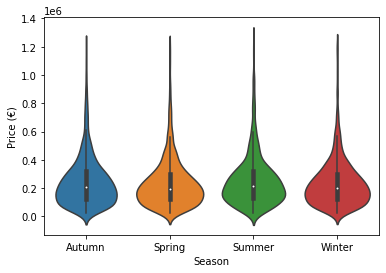

In [35]:
sns.violinplot(x="Season", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

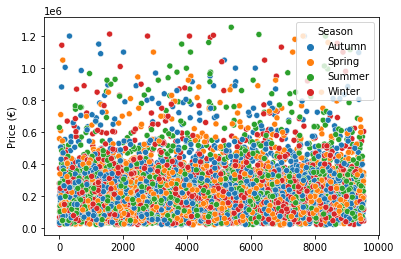

In [36]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Season')


### GDP

<AxesSubplot:xlabel='GDP (USD-Billion)', ylabel='Price (€)'>

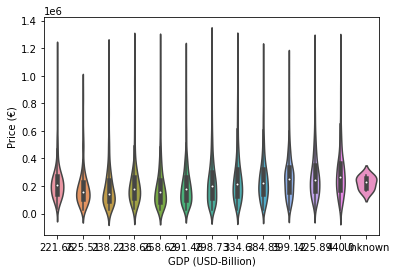

In [37]:
sns.violinplot(x="GDP (USD-Billion)", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

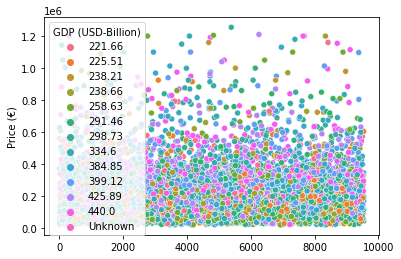

In [38]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='GDP (USD-Billion)')


### Total Number of Loan Approved

<AxesSubplot:xlabel='Total Number of Loans Approved', ylabel='Price (€)'>

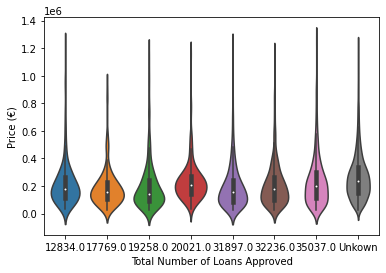

In [39]:
sns.violinplot(x="Total Number of Loans Approved", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

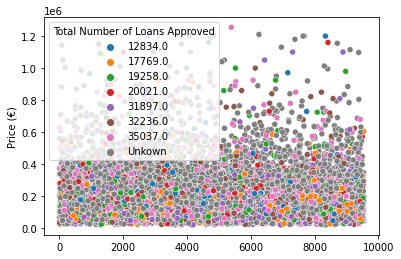

In [40]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Total Number of Loans Approved')



### Added Post Codes

<AxesSubplot:xlabel='Added Post Codes', ylabel='Price (€)'>

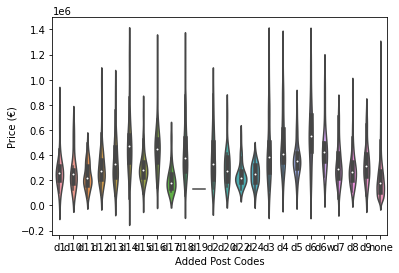

In [41]:
sns.violinplot(x="Added Post Codes", y="Price (€)", data=train)

<AxesSubplot:ylabel='Price (€)'>

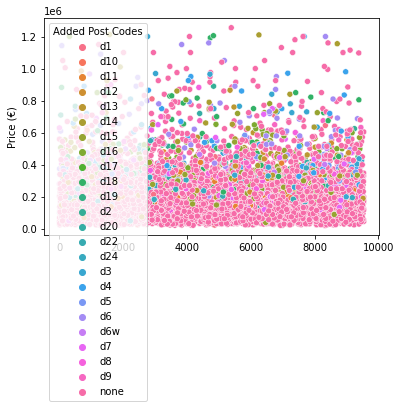

In [42]:
sns.scatterplot(data=train, x=train.index, y='Price (€)', hue='Added Post Codes')


In [43]:
CorrelationDataFrame = train.drop('Address', 1)


CorrelationDataFrame['Month'] = train['Month'].astype('int')
CorrelationDataFrame['Year'] = train['Year'].astype('int')





CorrelationDataFrame.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                      int32
Year                                       int32
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

### For each continuous feature, plot its interaction with the target feature (a plot for each pair of continuous feature and target feature). Discuss what you observe from these plots, e.g., which continuous features seem to be better at predicting the target feature? Choose a subset of continuous features you find promising (if any). Justify your choices.

- There is a very weak correlation between Year and Price. 

In [44]:
CorrelationDataFrame.corr()

,Price (€),Month,Year
Price (€),1.000000,-0.008989,0.171471
Month,-0.008989,1.000000,-0.023942
Year,0.171471,-0.023942,1.000000


In [45]:
# train = pd.get_dummies(data=train, drop_first=True)

CorrelationDataFrame = pd.get_dummies(data=CorrelationDataFrame, drop_first=True)



In [46]:
CorrelationDataFrame.head(5)

,Date of Sale (yyyy/mm/dd),Price (€),Month,Year,Postal Code_d10,Postal Code_d11,Postal Code_d12,Postal Code_d13,Postal Code_d14,Postal Code_d15,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
551,2021-04-01,260000.0,4,2021,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4758,2015-05-22,285000.0,5,2015,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4358,2016-02-24,101000.0,2,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1643,2019-06-18,200000.0,6,2019,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3511,2013-11-25,167000.0,11,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
CorrelationDataFrame.corr()

,Price (€),Month,Year,Postal Code_d10,Postal Code_d11,Postal Code_d12,Postal Code_d13,Postal Code_d14,Postal Code_d15,Postal Code_d16,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
Price (€),1.000000,-0.008989,0.171471,0.009026,0.003821,0.034612,0.061342,0.130774,0.044726,0.116858,...,0.005926,0.101730,0.152341,0.069717,0.212408,0.057825,0.048283,0.035025,0.055914,-0.340752
Month,-0.008989,1.000000,-0.023942,-0.002012,0.008327,-0.003759,-0.016768,-0.006532,-0.020675,-0.019171,...,0.014768,-0.016768,-0.019274,0.033191,0.002079,-0.014204,0.002320,0.015059,-0.019621,0.018957
Year,0.171471,-0.023942,1.000000,0.019622,0.027163,0.002258,0.003536,-0.002882,0.021748,0.030209,...,0.007926,0.003001,0.011899,0.020510,-0.014190,-0.021058,-0.001424,0.024307,0.005751,-0.026743
Postal Code_d10,0.009026,-0.002012,0.019622,1.000000,-0.003917,-0.004182,-0.003633,-0.003567,-0.005948,-0.003698,...,-0.004512,-0.003633,-0.004153,-0.003567,-0.004210,-0.001745,-0.004066,-0.004846,-0.004295,-0.075474
Postal Code_d11,0.003821,0.008327,0.027163,-0.003917,1.000000,-0.010707,-0.009301,-0.009132,-0.015229,-0.009467,...,-0.011553,-0.009301,-0.010634,-0.009132,-0.010780,-0.004467,-0.010410,-0.012408,0.003203,-0.193236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Added Post Codes_d6w,0.057825,-0.014204,-0.021058,-0.001745,-0.004467,-0.004769,-0.004143,-0.004068,-0.006784,-0.004217,...,-0.005146,-0.004143,-0.004736,-0.004068,-0.004802,1.000000,-0.004637,-0.005527,-0.004898,-0.086073
Added Post Codes_d7,0.048283,0.002320,-0.001424,-0.004066,-0.010410,-0.011115,-0.009656,-0.009481,-0.005819,-0.009828,...,-0.011994,-0.009656,-0.011039,-0.009481,-0.011191,-0.004637,1.000000,-0.012882,-0.011415,-0.200608
Added Post Codes_d8,0.035025,0.015059,0.024307,-0.004846,-0.012408,-0.013249,-0.011509,-0.011300,-0.010424,-0.011715,...,-0.014296,-0.011509,-0.013158,-0.011300,-0.013339,-0.005527,-0.012882,1.000000,-0.013606,-0.239106
Added Post Codes_d9,0.055914,-0.019621,0.005751,-0.004295,0.003203,-0.011741,-0.010199,-0.010014,-0.016700,-0.010381,...,-0.012669,-0.010199,-0.011660,-0.010014,-0.011821,-0.004898,-0.011415,-0.013606,1.000000,-0.211892


In [48]:
monthAndPrice = train[['Price (€)', 'Month']].copy()

YearAndPrice = train[['Price (€)', 'Year']].copy()

PostcodeAndPrice = train[['Price (€)', 'Added Post Codes']].copy()




In [49]:
monthAndPrice = pd.get_dummies(data=monthAndPrice, drop_first=True)
monthAndPrice.corr()


,Price (€),Month_2.0,Month_3.0,Month_4.0,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Month_10.0,Month_11.0,Month_12.0
Price (€),1.000000,0.010727,-0.020552,-0.026036,-0.003282,0.008756,0.017133,0.030406,-0.001513,0.013794,0.007830,-0.044917
Month_2.0,0.010727,1.000000,-0.075328,-0.075244,-0.080532,-0.075992,-0.081325,-0.080453,-0.079654,-0.084832,-0.084447,-0.092689
Month_3.0,-0.020552,-0.075328,1.000000,-0.080630,-0.086297,-0.081431,-0.087146,-0.086211,-0.085356,-0.090904,-0.090492,-0.099323
Month_4.0,-0.026036,-0.075244,-0.080630,1.000000,-0.086201,-0.081341,-0.087050,-0.086116,-0.085261,-0.090804,-0.090392,-0.099214
Month_5.0,-0.003282,-0.080532,-0.086297,-0.086201,1.000000,-0.087057,-0.093167,-0.092168,-0.091253,-0.097185,-0.096744,-0.106186
Month_6.0,0.008756,-0.075992,-0.081431,-0.081341,-0.087057,1.000000,-0.087914,-0.086971,-0.086108,-0.091706,-0.091289,-0.100199
Month_7.0,0.017133,-0.081325,-0.087146,-0.087050,-0.093167,-0.087914,1.000000,-0.093075,-0.092151,-0.098142,-0.097696,-0.107231
Month_8.0,0.030406,-0.080453,-0.086211,-0.086116,-0.092168,-0.086971,-0.093075,1.000000,-0.091163,-0.097089,-0.096648,-0.106081
Month_9.0,-0.001513,-0.079654,-0.085356,-0.085261,-0.091253,-0.086108,-0.092151,-0.091163,1.000000,-0.096125,-0.095689,-0.105028
Month_10.0,0.013794,-0.084832,-0.090904,-0.090804,-0.097185,-0.091706,-0.098142,-0.097089,-0.096125,1.000000,-0.101909,-0.111855


In [50]:
YearAndPrice = pd.get_dummies(data=YearAndPrice, drop_first=True)
YearAndPrice.corr()

,Price (€),Year_2011.0,Year_2012.0,Year_2013.0,Year_2014.0,Year_2015.0,Year_2016.0,Year_2017.0,Year_2018.0,Year_2019.0,Year_2020.0,Year_2021.0,Year_2022.0
Price (€),1.000000,-0.028778,-0.071530,-0.067468,-0.073977,-0.061079,-0.019767,0.022871,0.029796,0.052553,0.058992,0.110920,-0.003170
Year_2011.0,-0.028778,1.000000,-0.042414,-0.047738,-0.056962,-0.063856,-0.060197,-0.063273,-0.068316,-0.068621,-0.061774,-0.064909,-0.005215
Year_2012.0,-0.071530,-0.042414,1.000000,-0.056891,-0.067883,-0.076100,-0.071739,-0.075405,-0.081414,-0.081777,-0.073618,-0.077354,-0.006215
Year_2013.0,-0.067468,-0.047738,-0.056891,1.000000,-0.076405,-0.085654,-0.080745,-0.084871,-0.091635,-0.092044,-0.082860,-0.087065,-0.006996
Year_2014.0,-0.073977,-0.056962,-0.067883,-0.076405,1.000000,-0.102202,-0.096345,-0.101268,-0.109339,-0.109827,-0.098869,-0.103886,-0.008347
Year_2015.0,-0.061079,-0.063856,-0.076100,-0.085654,-0.102202,1.000000,-0.108007,-0.113526,-0.122574,-0.123121,-0.110836,-0.116461,-0.009358
Year_2016.0,-0.019767,-0.060197,-0.071739,-0.080745,-0.096345,-0.108007,1.000000,-0.107021,-0.115549,-0.116065,-0.104485,-0.109787,-0.008821
Year_2017.0,0.022871,-0.063273,-0.075405,-0.084871,-0.101268,-0.113526,-0.107021,1.000000,-0.121454,-0.121997,-0.109824,-0.115397,-0.009272
Year_2018.0,0.029796,-0.068316,-0.081414,-0.091635,-0.109339,-0.122574,-0.115549,-0.121454,1.000000,-0.131719,-0.118576,-0.124594,-0.010011
Year_2019.0,0.052553,-0.068621,-0.081777,-0.092044,-0.109827,-0.123121,-0.116065,-0.121997,-0.131719,1.000000,-0.119106,-0.125150,-0.010056


In [51]:
PostcodeAndPrice = pd.get_dummies(data=PostcodeAndPrice, drop_first=True)
PostcodeAndPrice.corr()

,Price (€),Added Post Codes_d10,Added Post Codes_d11,Added Post Codes_d12,Added Post Codes_d13,Added Post Codes_d14,Added Post Codes_d15,Added Post Codes_d16,Added Post Codes_d17,Added Post Codes_d18,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
Price (€),1.000000,0.007183,-0.002953,0.033783,0.063181,0.142994,0.053543,0.114464,-0.009527,0.143690,...,0.005926,0.101730,0.152341,0.069717,0.212408,0.057825,0.048283,0.035025,0.055914,-0.340752
Added Post Codes_d10,0.007183,1.000000,-0.004736,-0.004766,-0.004390,-0.004258,-0.006717,-0.004016,-0.002250,-0.005471,...,-0.004944,-0.003980,-0.004550,-0.003908,-0.004613,-0.001911,-0.004455,-0.005310,-0.004705,-0.082690
Added Post Codes_d11,-0.002953,-0.004736,1.000000,-0.012292,-0.011322,-0.010981,-0.017323,-0.010357,-0.005803,-0.014110,...,-0.012751,-0.010265,-0.011736,-0.010079,-0.011897,-0.004930,-0.011489,-0.013694,-0.012135,-0.213262
Added Post Codes_d12,0.033783,-0.004766,-0.012292,1.000000,-0.011394,-0.011051,-0.017434,-0.010423,-0.005840,-0.014200,...,-0.012832,-0.010331,-0.011811,-0.010143,-0.011973,-0.004961,-0.011563,-0.013782,-0.012213,-0.214624
Added Post Codes_d13,0.063181,-0.004390,-0.011322,-0.011394,1.000000,-0.010179,-0.016058,-0.009601,-0.005379,-0.013079,...,-0.011820,-0.009516,-0.010879,-0.009343,-0.011028,-0.004570,-0.010650,-0.012694,-0.011249,-0.197690
Added Post Codes_d14,0.142994,-0.004258,-0.010981,-0.011051,-0.010179,1.000000,-0.015574,-0.009311,-0.005217,-0.012685,...,-0.011463,-0.009229,-0.010551,-0.009061,-0.010696,-0.004432,-0.010329,-0.012311,-0.010910,-0.191729
Added Post Codes_d15,0.053543,-0.006717,-0.017323,-0.017434,-0.016058,-0.015574,1.000000,-0.014690,-0.008230,-0.020012,...,-0.018084,-0.014559,-0.016645,-0.014295,-0.016874,-0.006992,-0.016295,-0.019422,-0.017212,-0.302472
Added Post Codes_d16,0.114464,-0.004016,-0.010357,-0.010423,-0.009601,-0.009311,-0.014690,1.000000,-0.004921,-0.011965,...,-0.010812,-0.008705,-0.009952,-0.008547,-0.010088,-0.004180,-0.009743,-0.011612,-0.010291,-0.180842
Added Post Codes_d17,-0.009527,-0.002250,-0.005803,-0.005840,-0.005379,-0.005217,-0.008230,-0.004921,1.000000,-0.006703,...,-0.006058,-0.004877,-0.005576,-0.004788,-0.005652,-0.002342,-0.005459,-0.006506,-0.005766,-0.101321
Added Post Codes_d18,0.143690,-0.005471,-0.014110,-0.014200,-0.013079,-0.012685,-0.020012,-0.011965,-0.006703,1.000000,...,-0.014729,-0.011858,-0.013557,-0.011643,-0.013743,-0.005695,-0.013272,-0.015819,-0.014019,-0.246360


## (2). Predictive Modeling and Evaluation: Linear Regression.

#### (2.1) On the training set, train a linear regression model to predict the target feature, using only the descriptive features selected in exercise (1) above.

In [52]:

train_feature = ["County","Description of Property","Year", "Month","Season", "Province", "Added Post Codes"]
target_feature1 = ['Price (€)']

train = df[train_feature]
target = df[target_feature1]


train = pd.get_dummies(data=train, drop_first=True)
train.head()

# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3,random_state=1)


,County_Cavan,County_Clare,County_Cork,County_Donegal,County_Dublin,County_Galway,County_Kerry,County_Kildare,County_Kilkenny,County_Laois,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
train.dtypes

County_Cavan             uint8
County_Clare             uint8
County_Cork              uint8
County_Donegal           uint8
County_Dublin            uint8
                         ...  
Added Post Codes_d6w     uint8
Added Post Codes_d7      uint8
Added Post Codes_d8      uint8
Added Post Codes_d9      uint8
Added Post Codes_none    uint8
Length: 78, dtype: object

In [54]:
train.isnull().values.any()


False

In [55]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train,target,test_size=0.3, random_state=1)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(6547, 78)
(2806, 78)
(6547, 1)
(2806, 1)


### Trainnig the Linear Regression Model 

In [56]:
LR = LinearRegression().fit(Xtrain,Ytrain)
LR

LinearRegression()

In [57]:
print("Features: \n", Xtrain)
print("Coeficients: \n", LR.coef_)
print("\nIntercept: \n", LR.intercept_)

Features: 
       County_Cavan  County_Clare  County_Cork  County_Donegal  County_Dublin  \
551              0             0            0               0              0   
4758             0             0            0               0              1   
4358             0             0            0               0              0   
1643             0             0            0               0              1   
3511             0             0            0               0              0   
...            ...           ...          ...             ...            ...   
2972             0             0            0               0              1   
7975             0             0            0               0              1   
925              0             0            0               0              1   
5312             0             0            0               0              1   
237              0             0            0               0              0   

      County_Galway  County

In [58]:
print(train_feature)

['County', 'Description of Property', 'Year', 'Month', 'Season', 'Province', 'Added Post Codes']


In [59]:
# feature_importance = pd.DataFrame({'feature': train, 'importance':LR.coef_})


In [60]:
predictions = LR.predict(Xtest)
predictions

array([[138648.],
       [401104.],
       [266896.],
       ...,
       [216216.],
       [312672.],
       [119456.]])

<AxesSubplot:xlabel='Price (€)'>

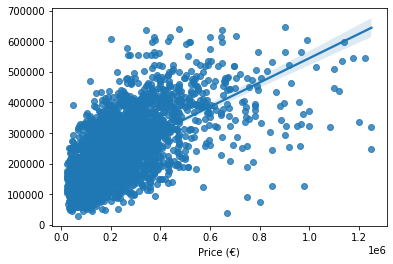

In [61]:
sns.regplot(Ytest,predictions)


In [62]:
X_train_Sm= sm.add_constant(Xtrain)
X_train_Sm= sm.add_constant(Xtrain)
ls=sm.OLS(Ytrain,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              Price (€)   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     57.47
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:28:59   Log-Likelihood:                -86657.
No. Observations:                6547   AIC:                         1.735e+05
Df Residuals:                    6474   BIC:                         1.740e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

#### (2.2) Interpetation of the linear regression model

#### (2.3) Print the predicted target feature value for the first 10 training examples.

In [111]:
training_data_predictions =LR.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   202040.0
4758   285000.0   341936.0
4358   101000.0   120360.0
1643   200000.0   265536.0
3511   167000.0   125104.0
4552   115000.0   442576.0
6224   269000.0   293760.0
3159   250850.0   352424.0
5699   212000.0   285400.0
9246    31500.0    79944.0


#### Function for computing evaluation metrics

In [64]:
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    #print("MSE: ", metrics.mean_squared_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    print('\n====================')

    
    
printMetrics(Ytrain, training_data_predictions)



MAE:  93041.26522223919
RMSE:  135563.29202038015
R2:  0.38988806238847495



#### (2.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set

In [112]:
training_data_predictions =LR.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(training_data_predictions, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)  Predicted
551    260000.0   202040.0
4758   285000.0   341936.0
4358   101000.0   120360.0
1643   200000.0   265536.0
3511   167000.0   125104.0
4552   115000.0   442576.0
6224   269000.0   293760.0
3159   250850.0   352424.0
5699   212000.0   285400.0
9246    31500.0    79944.0


In [113]:
test_data_predictions =LR.predict(Xtest)


ActualVPredicted = pd.concat([Ytest, pd.DataFrame(test_data_predictions, columns=['Predicted'], index=Xtest.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)  Predicted
841    75000.00   138648.0
7603  215859.00   401104.0
82    260000.00   266896.0
3168  195000.00   120256.0
4699  170000.00   196632.0
5821  121000.00   136848.0
8798  206452.59   271896.0
6903  315000.00   342096.0
2092  171285.00    76416.0
2639  281000.00   334848.0


In [67]:
Xtest

,County_Cavan,County_Clare,County_Cork,County_Donegal,County_Dublin,County_Galway,County_Kerry,County_Kildare,County_Kilkenny,County_Laois,...,Added Post Codes_d24,Added Post Codes_d3,Added Post Codes_d4,Added Post Codes_d5,Added Post Codes_d6,Added Post Codes_d6w,Added Post Codes_d7,Added Post Codes_d8,Added Post Codes_d9,Added Post Codes_none
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7603,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
82,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3168,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4699,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8129,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5754,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5182,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
scores = -cross_val_score(LinearRegression(), train, target, scoring='neg_mean_absolute_error', cv=5)
print(scores)
print("Avg MAE score over 5 folds:", np.mean(scores))
print("Stddev MAE score over 5 folds:", np.std(scores))

[9.32264661e+04 9.40971429e+04 9.50623435e+04 9.22840479e+04
 1.45068421e+13]
Avg MAE score over 5 folds: 2901368503966.587
Stddev MAE score over 5 folds: 5802736820598.174


In [69]:
eval_measures = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scores = cross_validate(LinearRegression(), train, target, scoring=eval_measures, cv=5)
scores

{'fit_time': array([0.0388937 , 0.05983925, 0.04986811, 0.03563809, 0.05111003]),
 'score_time': array([0.01496029, 0.01097131, 0.01695251, 0.00214672, 0.02792597]),
 'test_neg_mean_absolute_error': array([-9.32264661e+04, -9.40971429e+04, -9.50623435e+04, -9.22840479e+04,
        -1.45068421e+13]),
 'test_neg_mean_squared_error': array([-1.85384708e+10, -1.84424979e+10, -2.03008020e+10, -1.75363163e+10,
        -3.93538632e+29]),
 'test_r2': array([ 3.67686042e-01,  3.72584576e-01,  3.78278254e-01,  3.99076369e-01,
        -1.41074032e+19])}

In [70]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_neg_mean_absolute_error',
 'test_neg_mean_squared_error',
 'test_r2']

#### New Model Trained and evaluated using cross-validated on the full dataset

In [71]:
df.dtypes

Date of Sale (yyyy/mm/dd)         datetime64[ns]
Address                                 category
Postal Code                             category
County                                  category
Price (€)                                float64
Not Full Market Price                   category
VAT Exclusive                           category
Description of Property                 category
Property Size Description               category
Month                                   category
Year                                    category
Season                                  category
Province                                category
GDP (USD-Billion)                       category
Total Number of Loans Approved          category
Added Post Codes                        category
dtype: object

In [72]:
wholeDataset_train_feature = ["County","Description of Property","Month","Season", "Province", "Added Post Codes"]
wholeDataset_train_feature_target_feature1 = ['Price (€)']

WholeDataSet_train = df[wholeDataset_train_feature]
WholeDataSet_target = df[wholeDataset_train_feature_target_feature1]


WholeDataSet_train = pd.get_dummies(data=WholeDataSet_train, drop_first=True)
WholeDataSet_train.shape

(9353, 66)

In [73]:
LR_wholeDataSet = LinearRegression().fit(WholeDataSet_train,WholeDataSet_target)
LR_wholeDataSet

LinearRegression()

In [74]:
features = WholeDataSet_train.columns

print("\nIntercept: \n", LR_wholeDataSet.intercept_)
print("Features and coeficients:", list(zip(features, LR_wholeDataSet.coef_)))


Intercept: 
 [-2.59637249e+18]
Features and coeficients: [('County_Cavan', array([-2.07416823e+18,  1.73673821e+18,  1.73673821e+18, -2.07416823e+18,
        2.06080000e+05,  3.39520992e+17,  1.73673821e+18,  1.12896000e+05,
        4.32640000e+04,  6.22400000e+03,  3.39520992e+17,  1.73673821e+18,
       -4.84680000e+04,  2.56320000e+04,  3.39520992e+17,  9.32480000e+04,
       -2.07416823e+18,  2.56000000e+03,  3.39520992e+17,  3.39520992e+17,
        1.73673821e+18,  1.73673821e+18,  1.15200000e+04,  2.24320000e+04,
        1.58656000e+05, -2.01760000e+04,  3.26400000e+03,  2.10119956e+18,
        2.10119956e+18,  2.10119956e+18, -1.41866236e+18, -1.41866236e+18,
       -1.41866236e+18,  2.25685150e+18,  2.25685150e+18,  2.25685150e+18,
       -1.16480000e+04,  1.55651942e+17,  3.67551386e+18,  2.25685150e+18,
        3.39520992e+17, -1.39721722e+18,  2.41368922e+18, -2.70675000e+04,
       -4.87750000e+04,  2.58300000e+04,  7.04460000e+04,  2.33422000e+05,
        1.40000000e+04, 

In [75]:
LR_wholeDataSet_predictions = LR_wholeDataSet.predict(WholeDataSet_train[features])

print("\nPredictions with multiple linear regression: \n")
actual_vs_predictedLR_wholeDataSet = pd.concat([WholeDataSet_target, pd.DataFrame(LR_wholeDataSet_predictions, columns=['Predicted'], index=df.index)], axis=1)
print(actual_vs_predictedLR_wholeDataSet)


Predictions with multiple linear regression: 

      Price (€)  Predicted
0     630000.00   303616.0
1     281000.00   281600.0
2     560000.00   348672.0
3      46000.00   194560.0
4     204000.00   180224.0
...         ...        ...
9540  118000.00   152064.0
9541  200000.00   146432.0
9542  605000.00   335360.0
9543   46666.67   151552.0
9544  176000.00   137216.0

[9353 rows x 2 columns]


In [76]:
scores = -cross_val_score(LinearRegression(), WholeDataSet_train, WholeDataSet_target, scoring='neg_mean_absolute_error', cv=5)
print(scores)
print("Avg MAE score over 5 folds:", np.mean(scores))
print("Stddev MAE score over 5 folds:", np.std(scores))

[9.71765200e+04 9.90962397e+04 9.88526467e+04 9.69085607e+04
 4.30544189e+12]
Avg MAE score over 5 folds: 861088456106.1046
Stddev MAE score over 5 folds: 1722176716195.2256


In [77]:
printMetrics(WholeDataSet_target, LR_wholeDataSet_predictions)



MAE:  97078.43217791083
RMSE:  139305.84695597313
R2:  0.34644291542651073



## (3). **Predictive Modeling and Evaluation:** Decision Tree.  


#### - (3.1) On the training set, train a decision tree model to predict the target feature, using the descriptive features selected in exercise (1) above. 

In [78]:
DTR = tree.DecisionTreeRegressor().fit(Xtrain,Ytrain )
DTR

DecisionTreeRegressor()

In [79]:
Test_predictions_DTR = DTR.predict(Xtest)
Test_predictions_DTR

array([120000.        , 673461.66666667,  60000.        , ...,
       146000.        , 275000.        , 126250.        ])

In [80]:
for importance, name in sorted(zip(DTR.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)

County_Dublin 0.2994931750737463
Description of Property_Second-Hand Dwelling house /Apartment 0.038510226427726876
Added Post Codes_d6 0.027408674365447822
Month_2.0 0.025348415920844605
Month_6.0 0.023345042981539475
Year_2021.0 0.02313771636592455
Month_9.0 0.022127707927469983
County_Wicklow 0.02127933793342899
Month_10.0 0.02097269069271709
Month_12.0 0.019420130160298702
Year_2019.0 0.019153458157115853
Month_11.0 0.018866530362669345
Month_7.0 0.01871981077241666
Year_2017.0 0.018424464907571582
County_Cork 0.01817639971685313
County_Kildare 0.01749482929386595
Year_2012.0 0.016986028891799818
Season_Winter 0.016680131804605994
Year_2013.0 0.016336540961957524
Year_2016.0 0.016312856058995604
Month_8.0 0.01617807495423751
Year_2015.0 0.015184711563744869
Month_5.0 0.014632379670925138
Year_2014.0 0.014358576962360923
Year_2018.0 0.01367449509937147
Season_Summer 0.013655518225188843
Month_3.0 0.012910027174473896
Year_2020.0 0.012391237306361628
County_Meath 0.011470846359134616

#### (3.2) Can you interpret the decision tree model? Discuss any knowledge you can gain in regard of the working of this model. 

#### (3.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

In [116]:


ActualVPredicted_DTR = pd.concat([Ytrain, pd.DataFrame(Train_predictions_DTR, columns=['Predicted'],index=Xtrain.index)], axis=1)
print(ActualVPredicted_DTR.head(10))

      Price (€)  Predicted
551    260000.0   260000.0
4758   285000.0   423750.0
4358   101000.0   101000.0
1643   200000.0   272500.0
3511   167000.0   103250.0
4552   115000.0   311250.0
6224   269000.0   258000.0
3159   250850.0   250850.0
5699   212000.0   212000.0
9246    31500.0    38500.0


In [82]:
printMetrics(Ytest, Test_predictions_DTR)



MAE:  118551.59976650984
RMSE:  172428.24155619703
R2:  -0.036260766122077515



#### (3.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and discuss your findings.

In [83]:
Train_predictions_DTR = DTR.predict(Xtrain)
Train_predictions_DTR

array([260000., 423750., 101000., ..., 364175., 520000., 224000.])

In [84]:
print("________ Test Data ________")
printMetrics(Ytest, Test_predictions_DTR)
print("\n________ Train Data ________")
printMetrics(Ytrain, Train_predictions_DTR)


________ Test Data ________


MAE:  118551.59976650984
RMSE:  172428.24155619703
R2:  -0.036260766122077515


________ Train Data ________


MAE:  49399.755622143486
RMSE:  91160.4602559473
R2:  0.7241084954391361



#### Cross Validation

- Here cross validation is implemented on the Decision tree model. 

In [85]:
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error

scores = cross_val_score(DecisionTreeRegressor(random_state=1), Xtrain, Ytrain, scoring=make_scorer(r2_score), cv=5)
print(scores)

print(scores.mean())

[-0.00665526  0.03513109 -0.03173914 -0.01289689 -0.07464708]
-0.01816145638850277


## (4).  **Predictive Modeling and Evaluation:** Random Forest.  


#### (4.1) On the training set, train a random forest model to predict the target feature, using the descriptive features selected in exercise (1) above.   

In [86]:
random_forest = RandomForestRegressor(random_state=0)
random_forest = random_forest.fit(Xtrain,Ytrain)

In [87]:
train_prediction_RF =  random_forest.predict(Xtrain)
train_prediction_RF

array([236917.118     , 417421.11688312, 160132.        , ...,
       364338.27333333, 516633.61      , 213394.        ])

In [88]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



#### (4.2) Can you interpret the random forest model? Discuss any knowledge you can gain in regard of the working of this model.

#### Looking at the importance of each feature

In [89]:
for importance, name in sorted(zip(random_forest.feature_importances_, Xtrain.columns),reverse=True):
 print (name, importance)

County_Dublin 0.2708985841653462
Description of Property_Second-Hand Dwelling house /Apartment 0.03911136183157693
Year_2021.0 0.02592582148568078
Added Post Codes_d6 0.025342542149293344
Season_Winter 0.023214806980357907
Month_9.0 0.02210707853544405
Month_10.0 0.02124685941565763
Month_11.0 0.021132478281477414
Month_6.0 0.0207880226730411
Year_2014.0 0.020263900358794797
Year_2017.0 0.01976809750179282
County_Wicklow 0.019625627519242628
Year_2016.0 0.019487852996078445
Year_2019.0 0.019099992869750757
Year_2015.0 0.01896761630893558
Month_12.0 0.01890897460244323
Year_2013.0 0.018756637148171686
Month_7.0 0.01864273429948141
Year_2018.0 0.018466535916450446
Month_2.0 0.018063516710177113
Month_8.0 0.01716299631069869
County_Kildare 0.016956442708241273
Year_2020.0 0.016673016403857942
Year_2012.0 0.01627890877821304
County_Cork 0.015887917647613364
Season_Summer 0.01461814224247625
Month_5.0 0.014088896443414396
Month_3.0 0.012987259599106281
Season_Spring 0.012757174737392374
Mon

 #### (4.3) Print the predicted target feature value for the first 10 training examples. Print a few regression evaluation measures computed on the full training set and discuss your findings so far.

In [117]:
train_prediction_RF =  random_forest.predict(Xtrain)


ActualVPredicted = pd.concat([Ytrain, pd.DataFrame(train_prediction_RF, columns=['Predicted'], index=Xtrain.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
551    260000.0  236917.118000
4758   285000.0  417421.116883
4358   101000.0  160132.000000
1643   200000.0  268111.233500
3511   167000.0  106843.261905
4552   115000.0  339565.000000
6224   269000.0  258158.179487
3159   250850.0  269956.388028
5699   212000.0  227045.666667
9246    31500.0   43822.166667


In [91]:
printMetrics(Ytrain, train_prediction_RF)



MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



#### (4.4) Evaluate the model using regression evaluation measures on the hold-out (30% examples) test set. Compare these results with the evaluation results obtained on the training (70% examples) dataset. Also compare these results with a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset). You can use classic k-fold cross-validation or k repeated random train/test (70/30) splits. Compare the cross-validation metrics to those obtained on the single train/test split and to the random forest out-of-sample error and discuss your findings.

In [92]:
test_prediction_RF =  random_forest.predict(Xtest)


print("________ Test Data ________")
printMetrics(Ytest, test_prediction_RF)
print("\n________ Train Data ________")
printMetrics(Ytrain, train_prediction_RF)


________ Test Data ________


MAE:  103806.9166937207
RMSE:  150319.70640607533
R2:  0.212439193782607


________ Train Data ________


MAE:  62675.08979778963
RMSE:  97286.57545961744
R2:  0.6857819408895053



In [118]:
ActualVPredicted = pd.concat([Ytest, pd.DataFrame(test_prediction_RF, columns=['Predicted'], index=Xtest.index)], axis=1)
print(ActualVPredicted.head(10))

      Price (€)      Predicted
841    75000.00  111337.857143
7603  215859.00  651961.768072
82    260000.00  127878.828036
3168  195000.00   99854.680000
4699  170000.00  177409.108067
5821  121000.00  102031.625000
8798  206452.59  248696.749762
6903  315000.00  311372.739733
2092  171285.00   65549.712222
2639  281000.00  338988.333333


#### Cross Validation with Random Forest

- K-Fold Cross Validation


In [94]:
scores = cross_val_score(RandomForestRegressor(random_state=1), Xtrain, Ytrain, scoring=make_scorer(r2_score), cv=5)
print(scores)

print(scores.mean())

[0.19220289 0.26543034 0.22974318 0.22356948 0.16176059]
0.2145412956704809


## (5).  **Improving Predictive Models.**


#### (5.1) Which model of the ones trained above performs better at predicting the target feature? Is it more accurate than a simple model that always predicts the average price computed from the training set, for the same year as the test example? Justify your answers.

- Showing results of All three modes:

#### (5.2) Summarise your understanding of the problem and of your predictive modeling results so far. Can you think of any new ideas to improve the best model so far (e.g., by using furher data prep such as: feature selection, feature re-scaling, creating new features, combining models, or using other knowledge)? Please show how your ideas actually work in practice, by training and evaluating your proposed models. Summarise your findings so far.

#### (5.3) Take your best model trained and selected based on past data (i.e. your cleaned Homework1 dataset), and evaluate it on the new test dataset provided with this homework (in file '22032022-PPR-Price-recent.csv'). Note that the new test data has to be transformed using the same steps as the past training data, otherwise the trained model cannot be used for prediction on the new data. Discuss your findings